# Detection Fraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBRegressor


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\hp\Desktop\Projects\Data-Projects\Synthetic_Financial_datasets_log.csv')

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
data.shape

(6362620, 11)

In [9]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: >

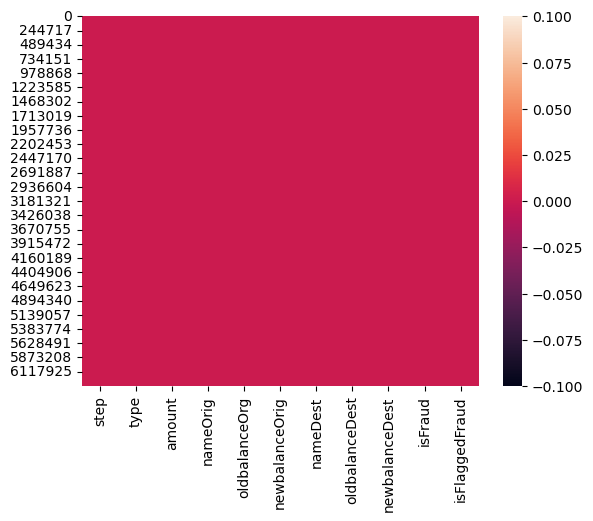

In [13]:
sns.heatmap(data.isnull())

In [13]:
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

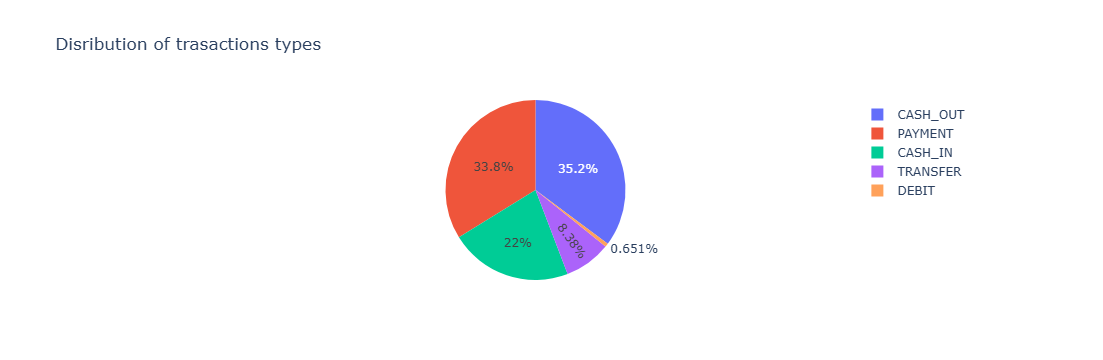

In [44]:
type=data['type'].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,values=quantity,names=transactions,title='Disribution of trasactions types')
figure.show()

In [15]:
la=LabelEncoder()

In [17]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])
    

In [19]:
obj

,type,nameOrig,nameDest
0,3,757869,1662094
1,3,2188998,1733924
2,4,1002156,439685
3,1,5828262,391696
4,3,3445981,828919
...,...,...,...
6362615,1,5651847,505863
6362616,4,1737278,260949
6362617,1,533958,108224
6362618,4,2252932,319713


In [21]:
non_obj

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [23]:
obj=obj.astype('int')

In [25]:
df=pd.concat([obj,non_obj],axis=1)

In [27]:
data =df.interpolate(method='linear')
df

,type,nameOrig,nameDest,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,757869,1662094,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,3,2188998,1733924,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,4,1002156,439685,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,5828262,391696,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,3,3445981,828919,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,1,5651847,505863,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,4,1737278,260949,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,1,533958,108224,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,4,2252932,319713,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [29]:
data.tail()

,type,nameOrig,nameDest,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,1,5651847,505863,743,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,4,1737278,260949,743,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,1,533958,108224,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,4,2252932,319713,743,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,1,919229,534595,743,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int32  
 1   nameOrig        int32  
 2   nameDest        int32  
 3   step            int64  
 4   amount          float64
 5   oldbalanceOrg   float64
 6   newbalanceOrig  float64
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [33]:
data.head()

,type,nameOrig,nameDest,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,757869,1662094,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,3,2188998,1733924,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,4,1002156,439685,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,5828262,391696,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,3,3445981,828919,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [35]:
data.corr()

,type,nameOrig,nameDest,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,1.000000,0.000213,0.584275,0.006635,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685
nameOrig,0.000213,1.000000,-0.000256,-0.000146,0.000124,-0.000648,-0.000675,0.000245,0.000255,-0.000464,0.000667
nameDest,0.584275,-0.000256,1.000000,0.003767,-0.169150,-0.162688,-0.166489,-0.198119,-0.203992,-0.021963,-0.001122
step,0.006635,-0.000146,0.003767,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.088419,0.000124,-0.169150,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.339760,-0.000648,-0.162688,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.352758,-0.000675,-0.166489,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,-0.104679,0.000245,-0.198119,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,-0.059364,0.000255,-0.203992,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.020833,-0.000464,-0.021963,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109


<Axes: >

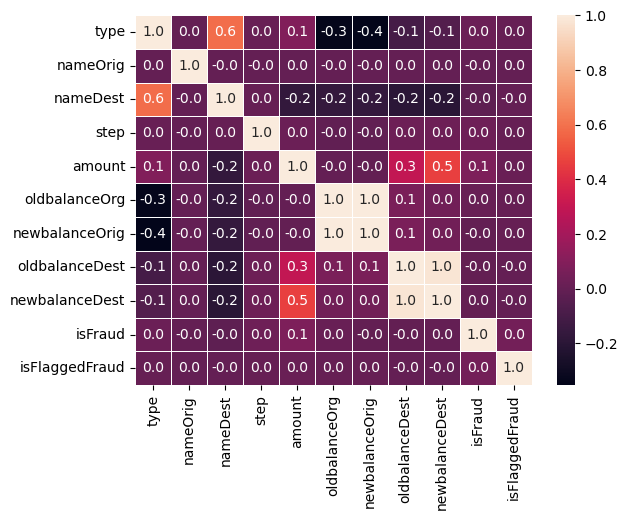

In [50]:
sns.heatmap(data.corr(),lw='0.5',annot=True,fmt='.1f')

In [52]:
correlation = data.corr()
print(correlation['isFraud'].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
nameOrig         -0.000464
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
nameDest         -0.021963
Name: isFraud, dtype: float64


In [54]:
data.head()

,type,nameOrig,nameDest,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,757869,1662094,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,3,2188998,1733924,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,4,1002156,439685,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,5828262,391696,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,3,3445981,828919,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [37]:
x=data.drop(['isFraud'],axis=1)
y=data['isFraud']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.10, random_state=42)

In [39]:
model1=LogisticRegression()

In [49]:
Algorithm=['LogisticRegression']
R2=[]
RMSE=[]

In [53]:
def pred(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(pre,y_test))

In [55]:
pred(model1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635804
           1       0.43      0.78      0.56       458

    accuracy                           1.00    636262
   macro avg       0.72      0.89      0.78    636262
weighted avg       1.00      1.00      1.00    636262

